In [1]:
import IPython.display as Disp
import os

## Quick Introduction: Rapid strong lensing identification

The methods paper for this pipeline can be found on arXiv [2106.12466](https://arxiv.org/abs/2106.12466)

Kindly follow the **[installation instructions](https://git.ligo.org/srashti.goyal/lensid/-/wikis/Installation-instructions)** page for running the pipeline.  Visit **[code review](https://git.ligo.org/srashti.goyal/lensid/-/wikis/Code-Review)** page for the details of various scripts/notebooks.


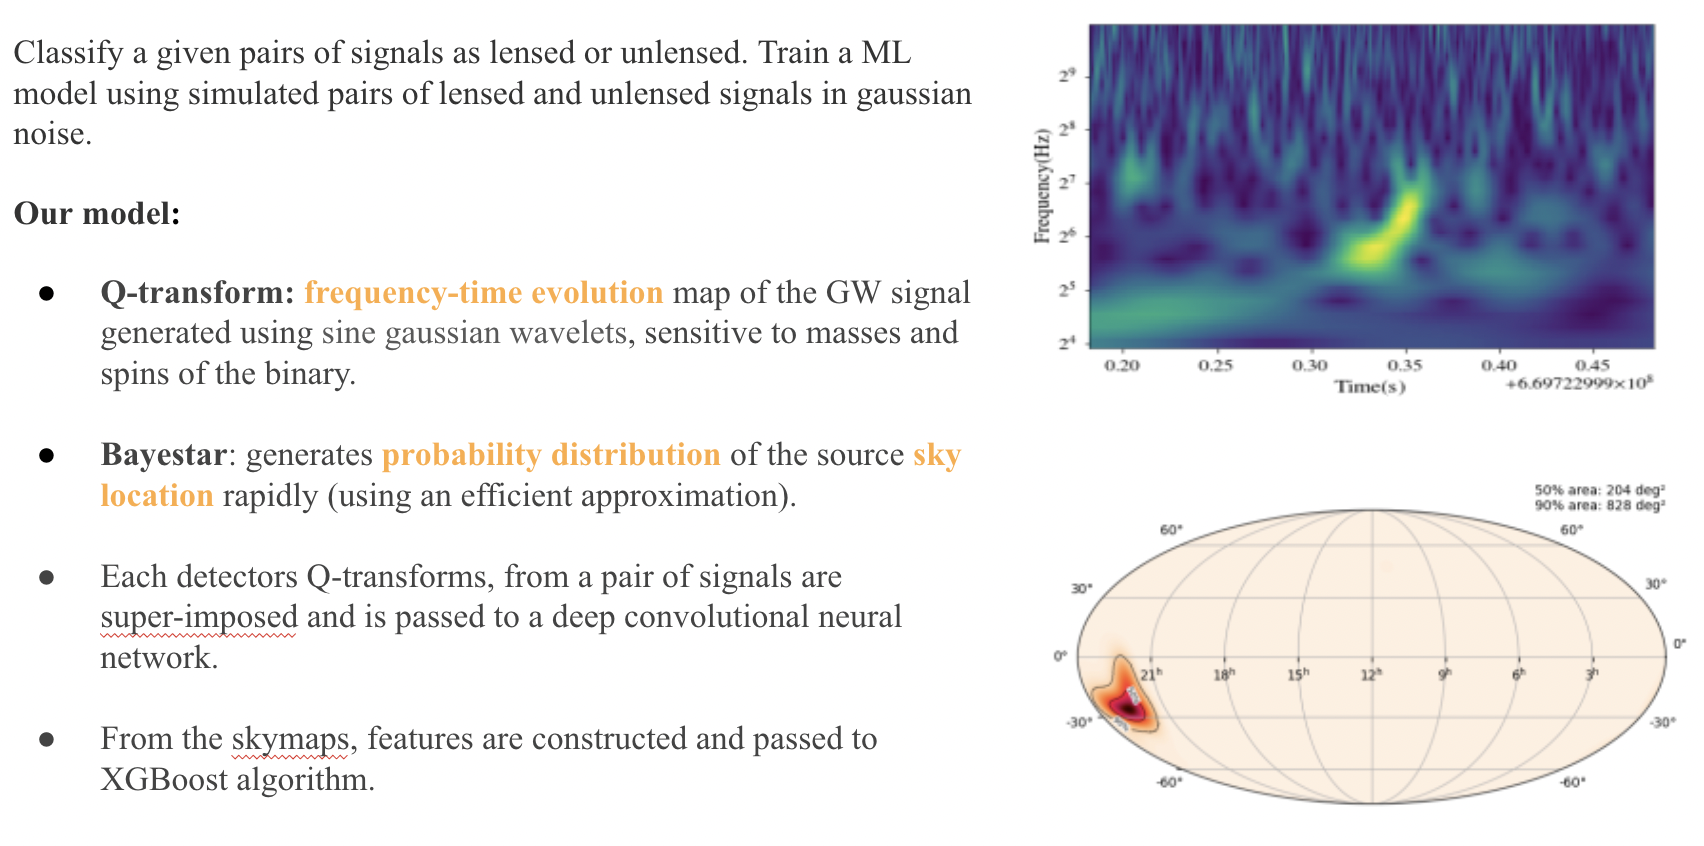

In [2]:
Disp.Image('intro.png',width=800)

## Aim of the tutorial: 

Learn about the **training and testing workflow** of the machine learning model with simulated pairs of lensed and unlensed signals in gaussian noise. 

There are broadly two parts: 1. Datasets preparation and 2. Training-Testing-Crossvalidating the ML models.

## 1st Config: Data generation

#### 3 kinds of data required :-
 - Qtransforms
 - Skymaps
 - Dataframes: img_0, img_1, Lensing

##### Options: Lensed, Unlensed, Custom



##### Inputs: Binary injection parameter set + tags as .npz file

In [3]:
config_path = '../train_test_workflow/config_train_test_data_gen.yaml'
Disp.FileLink(config_path)

/home/srashti.goyal/lensid/train_test_workflow/config_train_test_data_gen.yaml

In [4]:
Disp.Code(config_path)

base_out_dir : /home/srashti.goyal/lensid_runs/ML_1p0_O3psd
exec_file_loc : /home/srashti.goyal/.conda/envs/igwn-py37-hanabi/bin/
submit_dag : 0
accounting_tag : ligo.prod.o3.cbc.testgr.tiger
data_gen_dfs : 0
data_gen_sky : 0
data_gen_qts : 1
data_gen_train : 1
data_gen_test : 1
data_gen_lensed : 1
data_gen_unlensed : 1
data_gen_custom : 0

# train-lensed
train_lensed_inj_pars : /home/srashti.goyal/lensid/data/injection_pars/training/dominik_plaw2_lensed_inj_params_include_pol_phi0_refined.npz
start_idx_train_lensed : 0
num_train_lensed : 2813

# train-unlensed
start_idx_train_unlensed : 0
num_train_unlensed : 1000
train_unlensed_inj_pars : /home/srashti.goyal/lensid/data/injection_pars/training/analytical_psd_Dominik_powerlaw2_inj_samples_withsnr_refined.npz

# test-lensed
test_lensed_inj_pars : /home/srashti.goyal/lensid/data/injection_pars/haris-et-al/lensed_inj_data.npz
start_idx_test_lensed : 0
num_test_lensed : 300

# test-unlensed
test_unlensed_inj_pars : /home/srashti.goyal/lensid/data/injection_pars/haris-et-al/unlensed_inj_data.npz
start_idx_test_unlensed : 0
num_test_unlensed : 1000

# qts
out_dir_qts : /data/qts
asd_dir_txt : /home/srashti.goyal/lensid/data/PSDs/O3a_representative_psd
whitened : 1
qmode : 1  # (1 -> q : (3,7 m1>60; 4,8 m1<60)  , 2 -> q : (3,30))
psd_mode : 2  # (1: analytical 2: from asd_dir_txt)

# dataframes
out_dir_dfs : /data/dataframes

# skymaps
out_dir_sky : /data/bayestar_skymaps
psd_xml : /home/srashti.goyal/lensid/data/PSDs/O3a_representative_psd/O3a_representative.xml
#psd_xml : /home/srashti.goyal/lensid/data/PSDs/analytical_psd.xml


# custom
inj_pars : /home/srashti.goyal/lensid/subthreshold/unlensed_data/sub_unlensed_refined.npz
start_idx : 0
num_injs : 1186

### script to data generation create condor dag

In [5]:
condor_script = '../train_test_workflow/condor_data_gen_train_test_config.py'
Disp.FileLink(condor_script)

/home/srashti.goyal/lensid/train_test_workflow/condor_data_gen_train_test_config.py

### example dag

In [ ]:
!python ../train_test_workflow/condor_data_gen_train_test_config.py -config example_data_gen.yaml

## 2nd Config: Training and Testing 
#### One config to do it all:- 

- Train Densenets with QTs
- Extract features from skymaps and QTs/Densenets predictions
- Train and Test ML QTs, ML sky, ML combined + compare to PO

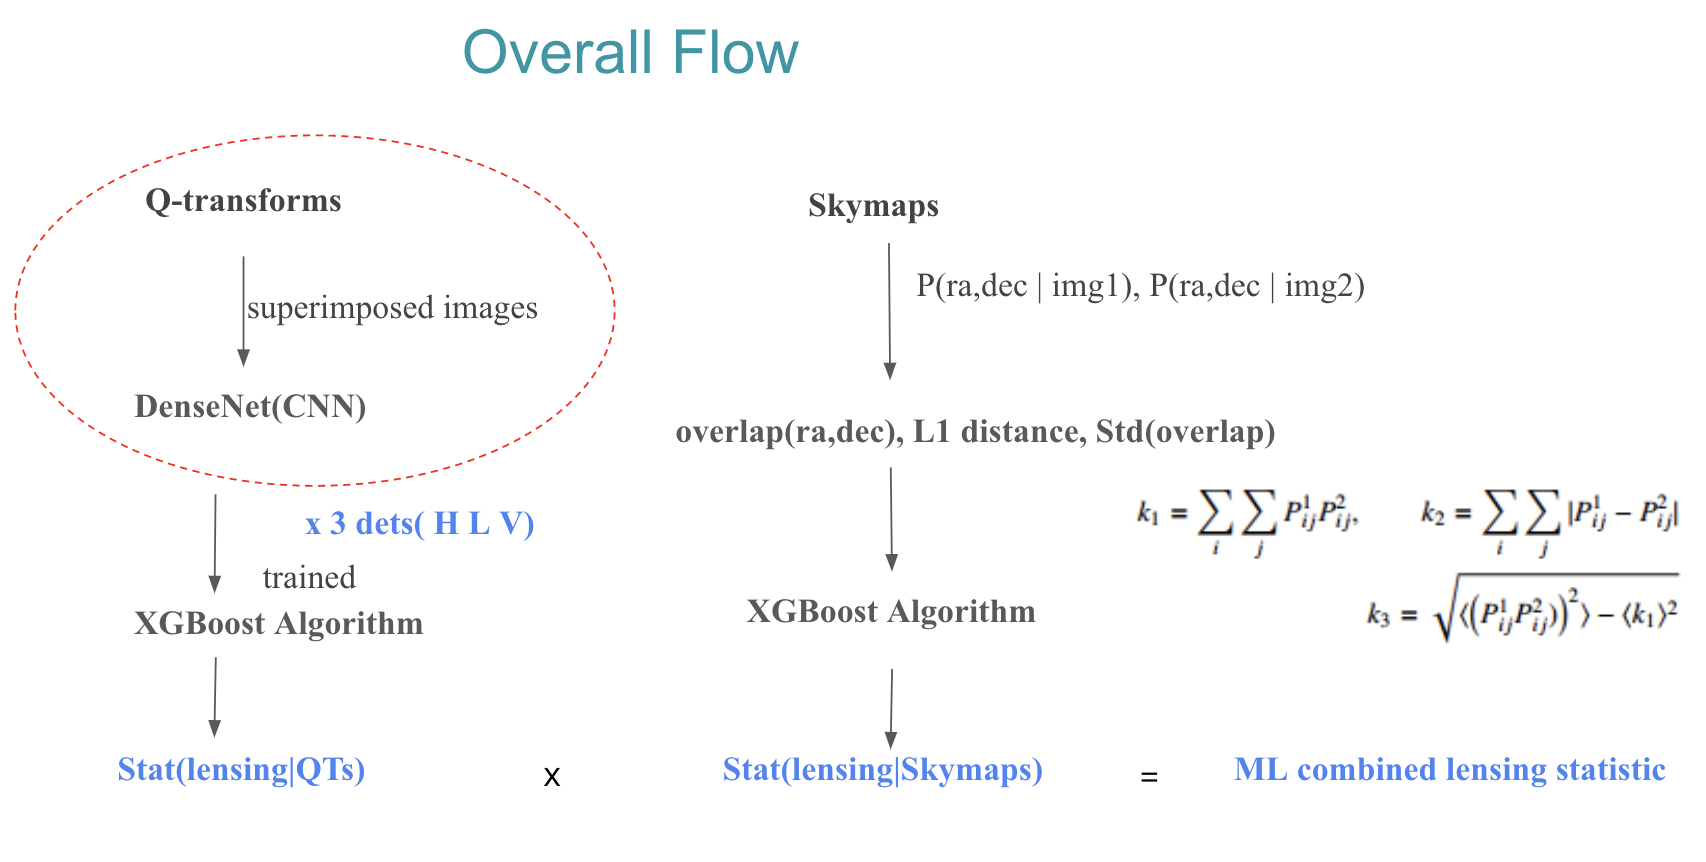

In [7]:
Disp.Image('original_workflow.png',width=800)

In [8]:
config_path = '../train_test_workflow/config_train_test_workflow_ml1p0_AnalyticalPsd-whitened.yaml'
Disp.FileLink(config_path)

/home/srashti.goyal/lensid/train_test_workflow/config_train_test_workflow_ml1p0_AnalyticalPsd-whitened.yaml

In [9]:
Disp.Code(config_path)

#[DEFAULT]
base_out_dir : /home/srashti.goyal/lensid_runs/ML_1p0_AnalyticalPsd_whitened
train_densenets : 1
calc_features_sky : 0
cal_features_qts : 1
train_test_qts : 1
train_test_sky : 0
test_combined_ml : 0
compare_to_blu : 1
calc_features_custom : 0
df_dir_train : /home/srashti.goyal/lensid_runs/ML_2p0_AnalyticalPsd/data/dataframes/train/
df_dir_test : /home/srashti.goyal/lensid_runs/ML_2p0_AnalyticalPsd/data/dataframes/test/
whitened : 1
exec_file_loc : /home/srashti.goyal/.conda/envs/igwn-py37-hanabi/bin/
submit_dag : 1
accounting_tag : ligo.prod.o3.cbc.testgr.tiger
#[train-densenets]
epochs : 20
lensed_df : lensed.csv
unlensed_df : unlensed_half.csv
train_h1 : 1
train_l1 : 1
train_v1 : 1
h1_lr : 0.01
l1_lr : 0.01 
v1_lr : 0.0005 
size_lensed : 1500
size_unlensed : 1500
include_phenom : 1
dense_model_dir_out : /saved_models/lr_fix/ #relative to base_out_dir
data_dir_qts_train : /home/srashti.goyal/lensid_runs/ML_1p0_AnalyticalPsd_whitened/data/qts/train/


#[feature-extraction]
dense_model_dir_in : /home/srashti.goyal/lensid_runs/ML_1p0_AnalyticalPsd_whitened/saved_models/lr_fix/
df_dir_train_features_out : /dataframes/train/ #relative to base_out_dir
df_dir_test_features_out : /dataframes/test/ #relative to base_out_dir
data_dir_qts_test : /home/srashti.goyal/lensid_runs/ML_1p0_AnalyticalPsd_whitened/data/qts/test/
data_dir_sky_train : /home/srashti.goyal/lensid_runs/ML_2p0_AnalyticalPsd/data/bayestar_skymaps/train
data_dir_sky_test : /home/srashti.goyal/lensid_runs/ML_2p0_AnalyticalPsd/data/bayestar_skymaps/test
tag_qts_out : '_lr_fix' #_kaggle
tag_sky_out : ''
train_features_extract : 1
test_features_extract : 1
#train_dfs_dict : { lensed : 100 , unlensed_half : 100 , unlensed_second_half : 100}
train_dfs_dict : { lensed : -1 , unlensed_half : -1 , unlensed_second_half : -1}
#test_dfs_dict : {lensed : 100 , unlensed : 100}
test_dfs_dict : {lensed : -1 , unlensed : -1}
    
#[train-test-cv-qts]
df_dir_train_features_in : /home/srashti.goyal/lensid_runs/ML_1p0_AnalyticalPsd_whitened/dataframes/train/
df_dir_test_features_in : /home/srashti.goyal/lensid_runs/ML_1p0_AnalyticalPsd_whitened/dataframes/test/
path_to_blu : /home/srashti.goyal/strong-lensing-ml/data/dataframes/haris_et_al/
train_size_lensed_xgbqts : 2400
cv_size_lensed_xgbqts : 2400
cv_splits : 10
scale_pos_weight_xgbqts : 0.01
max_depth_xgbqts : 6
n_estimators_xgbqts : 135
tag_qts_in : '_lr_fix'#_kaggle

#[train-test-cv-sky]
train_size_lensed_xgbsky : 2400
cv_size_lensed_xgbsky : 2400
scale_pos_weight_xgbsky : 0.01 #0.1 #0.01
max_depth_xgbsky : 6 #4 #6
n_estimators_xgbsky : 110 #105 #110
tag_sky_in : ''

#[test-ml-combined]
indir_df : /home/srashti.goyal/lensid_runs/ML_1p0_AnalyticalPsd_whitened/dataframes/test

### Training 3 Densenets with Qtransforms for each detector

- Trains on subset of lensed and unlensed QTs. 

- Runs without condor. 

- GPU-acceleration supported if  tensorflow-gpu + cuda libraries are installed.

In [10]:
Disp.FileLink('../train_test_workflow/train_three_densenets.py') 

/home/srashti.goyal/lensid/train_test_workflow/train_three_densenets.py

In [11]:
## placeholder only
# !python ../train_test_workflow/train_three_densenets.py -config CONFIG.YAML

### Feature Extraction

Generates condor dag file with following jobs :-

1. Predictions for Training and Testing set Qtransforms using DenseNets.
2. Skymaps features calculation from the training and testing set.


In [12]:
Disp.FileLink('../train_test_workflow/condor_train_test_features_extraction.py') 

/home/srashti.goyal/lensid/train_test_workflow/condor_train_test_features_extraction.py

#### example
Takes (5-15 mins to run)

In [ ]:
!python ../train_test_workflow/condor_train_test_features_extraction.py -config example_feature_extract.yaml

### Train, Test and cross validate : ML QTs,  ML Sky, ML combined

- Train and Test XGBoost for QTs, and XGBoost for Skymaps, given the extracted features.

- additionaly compares to the PO outputs.

- makes diagnostic plots and ROCs.

- runs without condor.

In [14]:
Disp.FileLink('../train_test_workflow/train_test_XGBs.py') 

/home/srashti.goyal/lensid/train_test_workflow/train_test_XGBs.py

#### Example 
Running on large dataset(~1 million pairs) with already computed features. Takes  roughly 5 mins to run.

In [ ]:
!python ../train_test_workflow/train_test_XGBs.py -config example_feature_extract.yaml

## Additional : ML predictions

The pipeline was used in O3b lensing paper for real events analysis. Scripts to prepare data for the events and the results can be found in this git repository: [lensid-ml-o3](https://git.ligo.org/srashti.goyal/lensid-ml-o3).

- Once we have the data (QTs, skymaps, dataframes) ML predictions can be made using the command line:``lensid_make_predictions -config CONFIG.YAML``

- To make sense of the ML statistics one needs to get False Positive Probability(FPP) corresponding to each pair, this requires one to simulate the background distribution. This can be done using the same data-gen, feature-extract, and lensid_make_predictions scripts as above, customising the config files.

In [16]:
Disp.Code('config_O3_events_ml1p0.yaml')

#Default
calc_features_sky : 1
cal_features_qts : 1
col_dict : {ML QTs : xgb_dense_QTS_0 , ML combined: densnet_xgbsky_bayestar_mul_0, ML sky : xgb_pred_bayestar_skymaps}
calc_fpp : 1
odir : /home/srashti.goyal/lensid_runs/check_predict
#Data
in_df : /home/srashti.goyal/lensid-ml-O3/O3_ML_gwtc3/dataframes/filtered_sky_mass_pairs.csv
data_dir_qts : /home/srashti.goyal/lensid-ml-O3/O3_ML_gwtc3/qts/
whitened : 0
include_phenom : 0
data_dir_sky : /home/srashti.goyal/lensid-ml-O3/O3_ML_gwtc3/bayestar_skymaps/
tag_qts : ''
tag_sky : ''
#ML Models
dense_model_dir: /home/srashti.goyal/lensid/saved_models/
xgboost_qt : /home/srashti.goyal/lensid/saved_models/XGBQT_0.pkl
xgboost_sky : /home/srashti.goyal/lensid/saved_models/XGBsky_0.pkl
#Background
fpp_dict : {ML QTs : xgb_dense_QTS_0 , ML combined: densnet_xgbsky_bayestar_mul, ML sky : xgb_pred_bayestar_skymaps}
background_df : /home/srashti.goyal/lensid-ml-O3/background/O3a_injs_ML_combined_git.csv

## Concluding remarks:-

This machine learning pipeline is for preliminary identification of strong lensing events rapidly(~2 secs for each pair). It does not takes into account the lensing properties such as time delay, morse phase, relative magnification. 

The upcoming developments are the following: classifying super-sub threshold pairs, training and testing in real noise. 

For any queries or for contributing to the pipeline kindly feel free to email: srashti.goyal@ligo.org / srashti.goyal@icts.res.in  